## Assignment 3, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


## Github Link: https://github.com/pariaighanian/Analysis_of_Complex_Netwroks/blob/main/assignment_03.ipynb

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections
from pprint import pprint
import random

In [22]:
# Read the edge list from the file 
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)
facebook_num_nodes = facebook_G.number_of_nodes()
print(f'Number of nodes in Facebook Network: {facebook_num_nodes}')

Number of nodes in Facebook Network: 133


## (a) Generate graphs based on Watts-Strogatz Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of ¯k and p. Please plot the graph structures, degree distributions, and clustering coefficients as well.


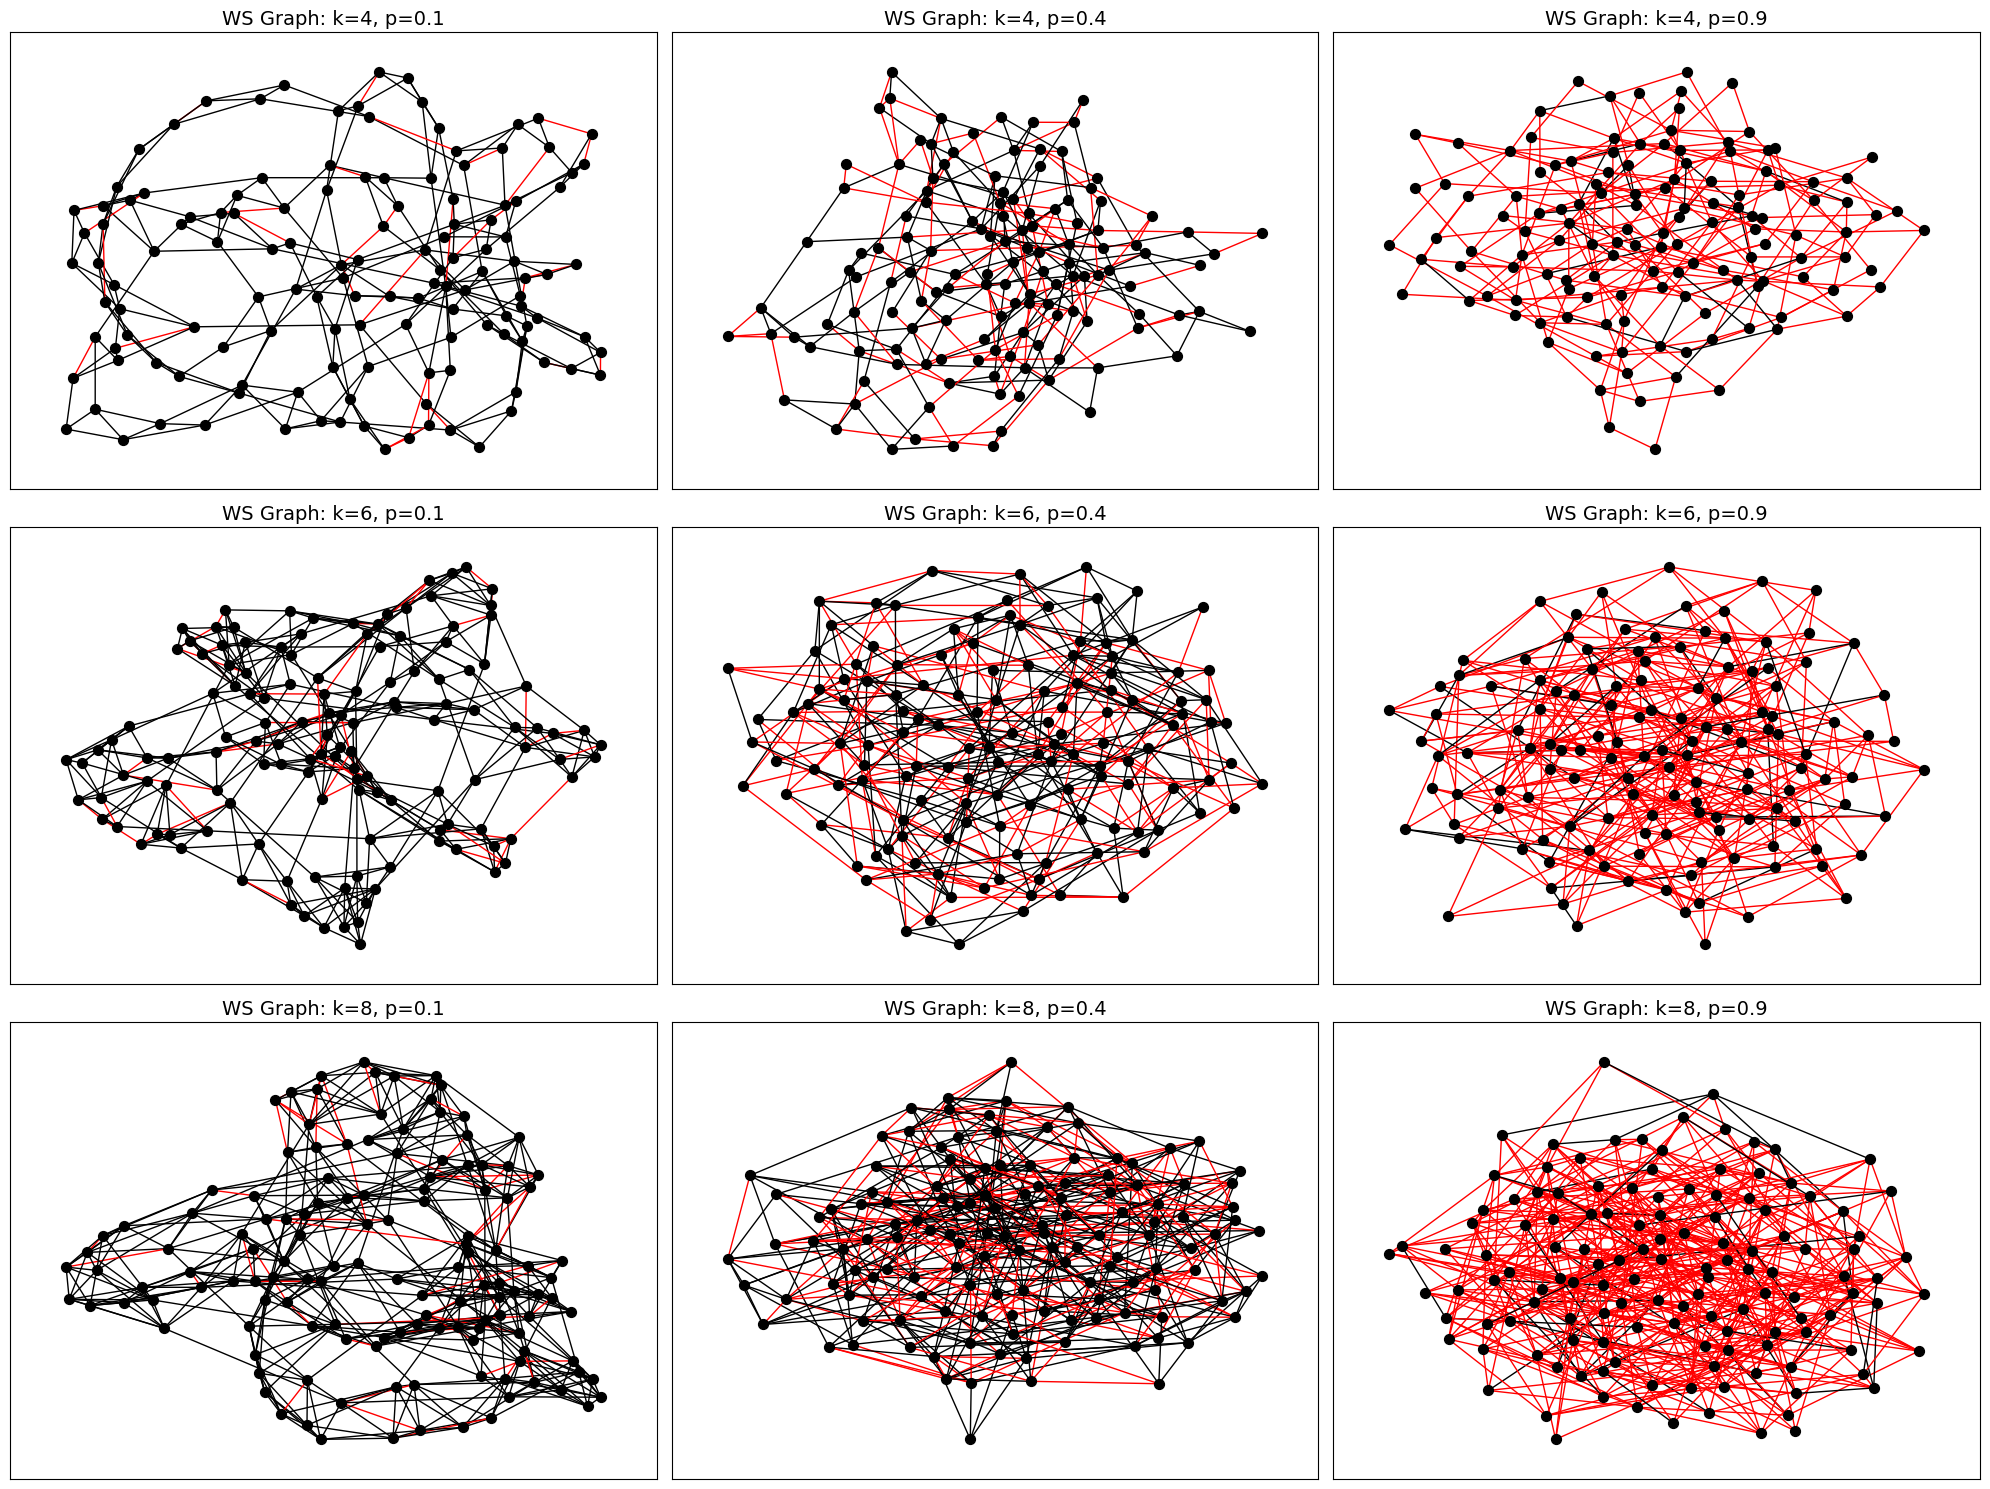

In [23]:
k_values = [4, 6, 8]  # Average degrees
p_values = [0.1, 0.4, 0.9]  # Rewiring probabilities

fig_graphs, axs_graphs = plt.subplots(len(k_values), len(p_values), figsize=(20, 15))

clustering_coefficients = []
degree_distributions = []

for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        # Generate Watts-Strogatz graph
        G = nx.watts_strogatz_graph(facebook_num_nodes, k, p)
        
        pos = nx.spring_layout(G)  # Use spring layout for better visualization
        
        # Determine edge colors based on rewiring probability
        edge_colors = ['red' if random.random() < p else 'black' for _ in G.edges()]
        
        # Plot the graph structure
        axs_graphs[i, j].set_title(f'WS Graph: k={k}, p={p}', fontsize=14)
        nx.draw_networkx(G, pos, node_size=50, ax=axs_graphs[i, j], with_labels=False, 
                         edge_color=edge_colors, node_color='black')  
        
        axs_graphs[i, j].set_xticks([])
        axs_graphs[i, j].set_yticks([])

        clustering_coeff = nx.average_clustering(G)
        clustering_coefficients.append((k, p, clustering_coeff))

        degrees = [G.degree(n) for n in G.nodes()]
        degree_distribution, bins = np.histogram(degrees, bins=np.arange(0, max(degrees) + 2))  # Create integer bins
        degree_distributions.append((k, p, bins[:-1], degree_distribution))

plt.tight_layout()
plt.show()


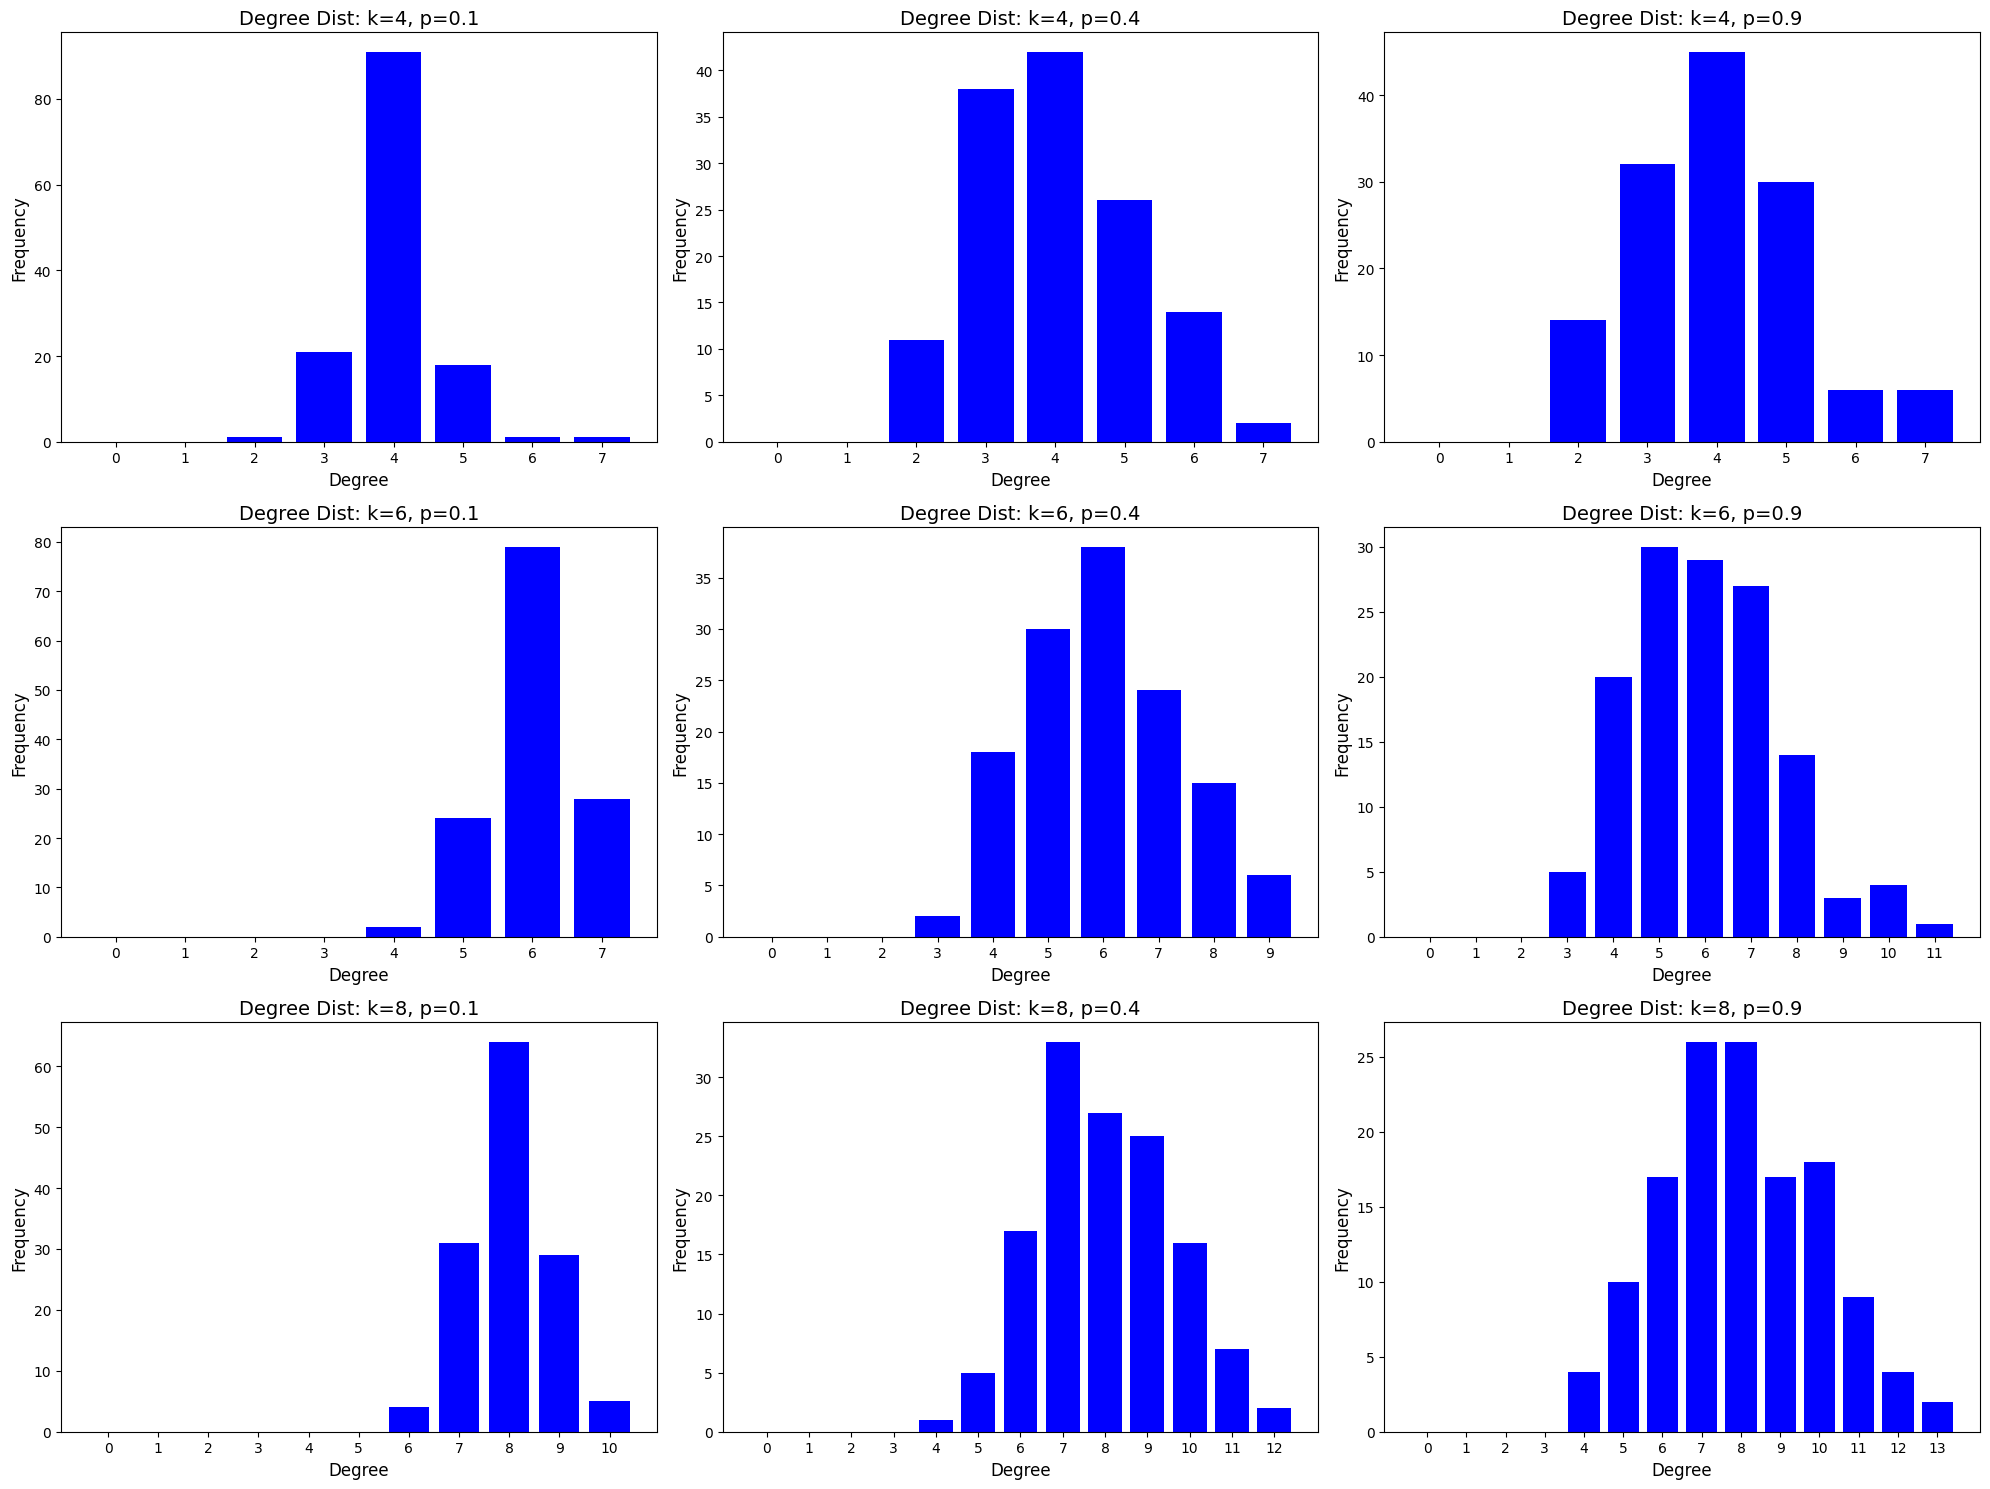

In [24]:
# Plotting Degree Distributions
fig_degree, axs_degree = plt.subplots(len(k_values), len(p_values), figsize=(20, 15))

for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        bins, distribution = [(d[2], d[3]) for d in degree_distributions if d[0] == k and d[1] == p][0]
        
        axs_degree[i, j].bar(bins, distribution, width=0.8, color='blue')
        axs_degree[i, j].set_title(f'Degree Dist: k={k}, p={p}', fontsize=14)
        axs_degree[i, j].set_xlabel('Degree', fontsize=12)
        axs_degree[i, j].set_ylabel('Frequency', fontsize=12)

        axs_degree[i, j].set_xticks(bins)  # Set ticks to be all bin centers
        axs_degree[i, j].set_xticklabels(bins)  # Set labels to be the same as tick positions

plt.tight_layout()
plt.show()

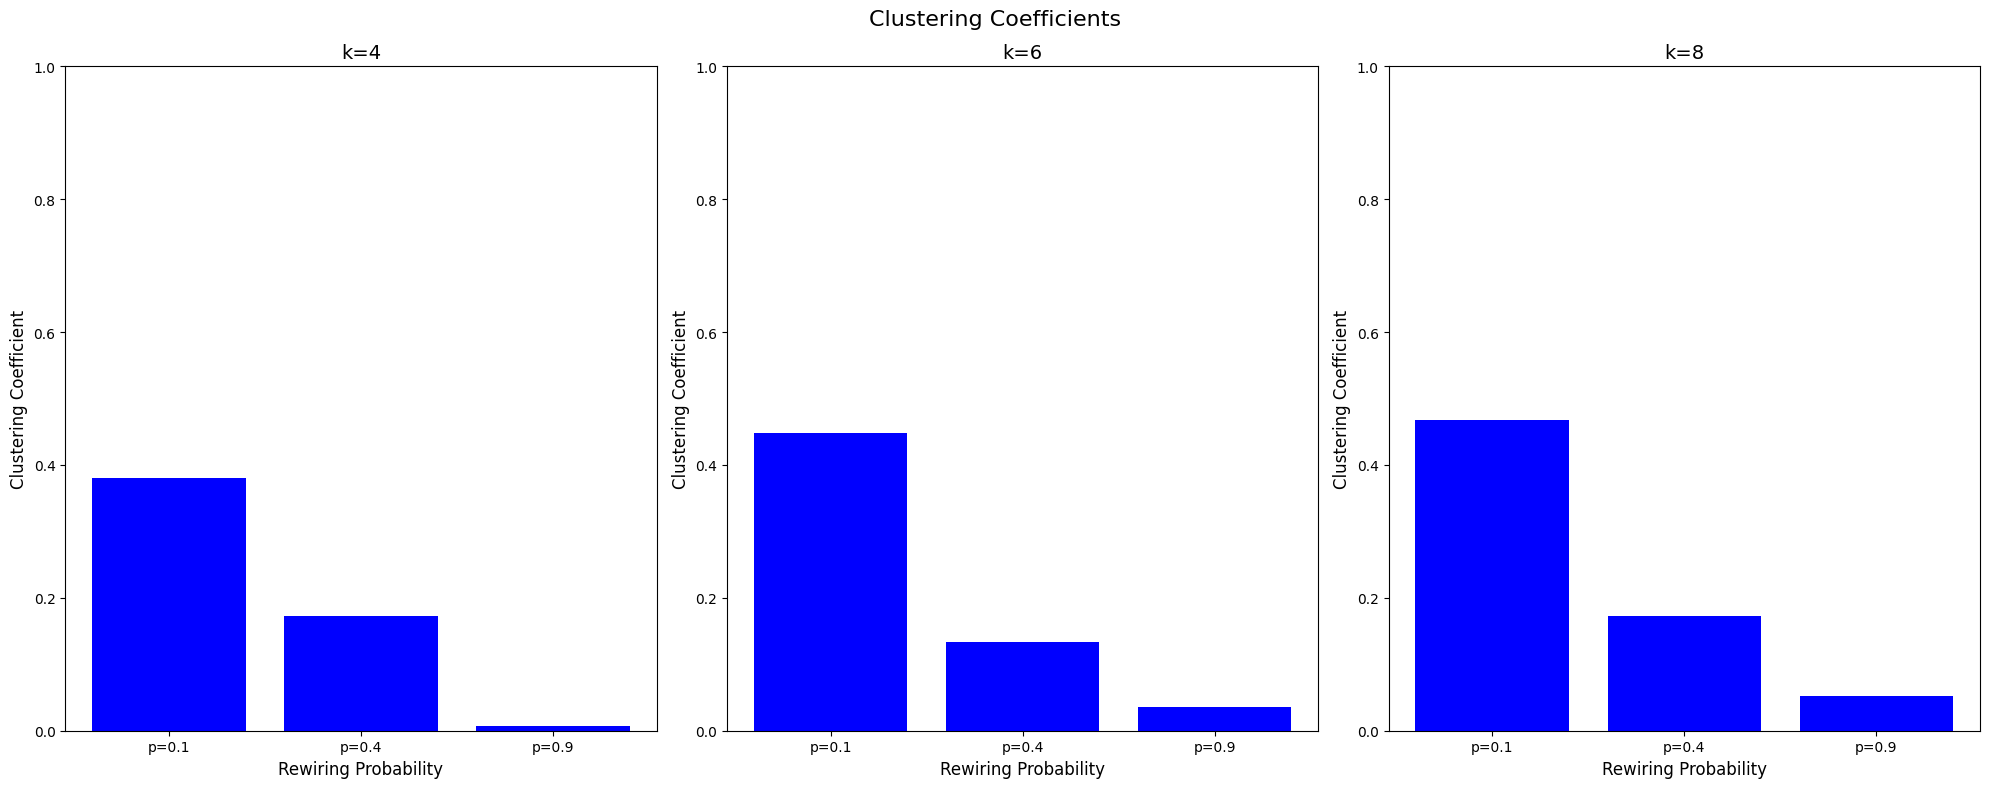

In [25]:
# Plotting Clustering Coefficients
fig_clustering, axs_clustering = plt.subplots(1, len(k_values), figsize=(20, 8))  
fig_clustering.suptitle('Clustering Coefficients', fontsize=16)

for i, k in enumerate(k_values):
    coeffs = [c[2] for c in clustering_coefficients if c[0] == k]
    
    axs_clustering[i].bar([f'p={p}' for p in p_values], coeffs, color='blue')
    axs_clustering[i].set_ylim(0, 1)
    axs_clustering[i].set_title(f'k={k}', fontsize=14)
    axs_clustering[i].set_xlabel('Rewiring Probability', fontsize=12)
    axs_clustering[i].set_ylabel('Clustering Coefficient', fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
clustering_coefficients

[(4, 0.1, 0.38027210884353746),
 (4, 0.4, 0.17200143215180802),
 (4, 0.9, 0.006516290726817042),
 (6, 0.1, 0.4480486931614752),
 (6, 0.4, 0.13327962764052984),
 (6, 0.9, 0.035223339734617935),
 (8, 0.1, 0.467579663444325),
 (8, 0.4, 0.17304245462140186),
 (8, 0.9, 0.05171123780146333)]

## (b) Generate scale-free graphs, and each of them should have the same number of nodes as FacebookEgo. Please generate 3 graphs with three different values of γ. Please plot the graph structures, degree distributions, and clustering coefficients as well.


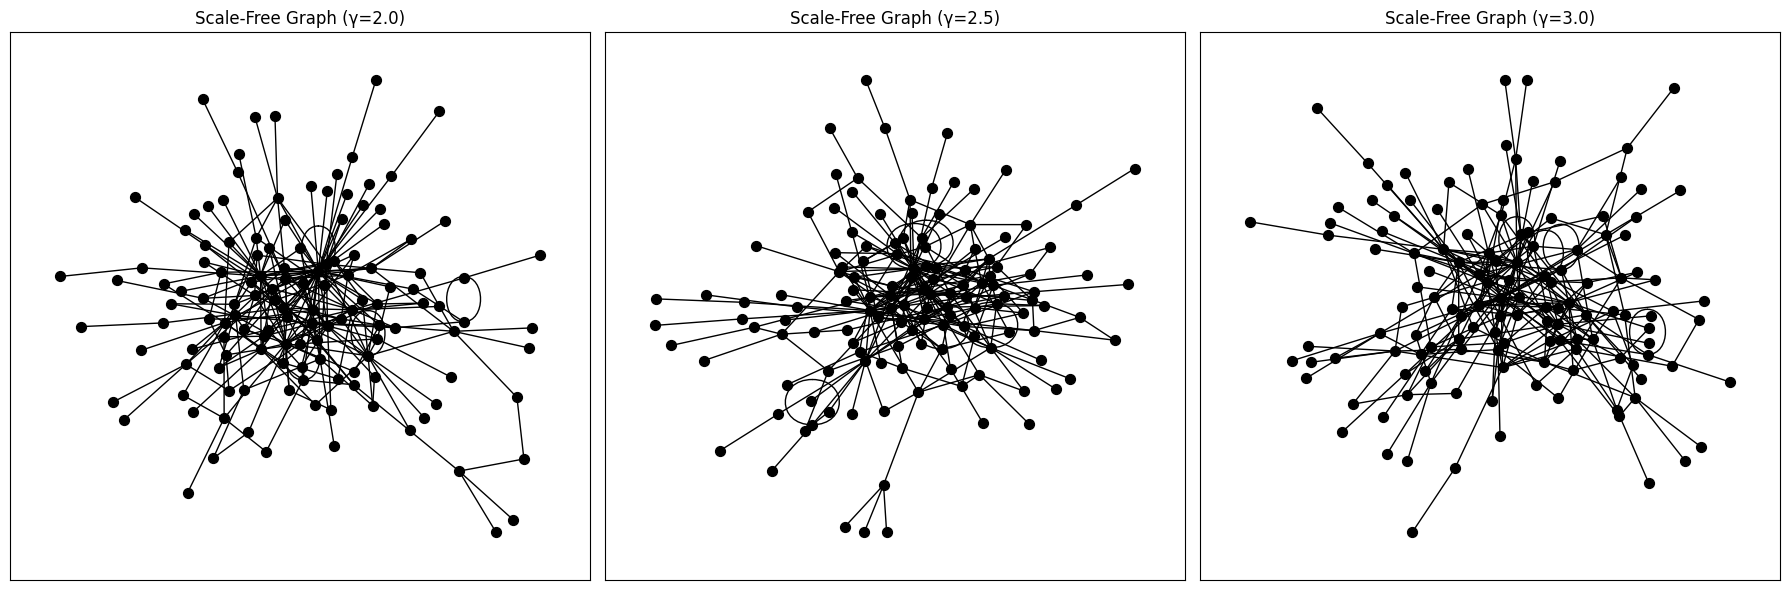

In [27]:
gamma_values = [2.0, 2.5, 3.0]

graphs = []
average_clustering_coeffs = []  
degree_distributions = []  

for gamma in gamma_values:
    # Generate a scale-free graph with specified delta_in and delta_out
    G = nx.scale_free_graph(facebook_num_nodes, delta_in=gamma, delta_out=gamma, seed=42)
    G = nx.Graph(G)  # Convert to simple graph to avoid multigraph issues
    G = G.to_undirected()  
    graphs.append(G)  

    avg_cc = nx.average_clustering(G)
    average_clustering_coeffs.append(avg_cc)

    degree_sequence = [d for n, d in G.degree()]
    degree_distributions.append(degree_sequence)

fig, axs = plt.subplots(1, len(gamma_values), figsize=(18, 6))

for i, G in enumerate(graphs):
    pos = nx.spring_layout(G, seed=42)  
    axs[i].set_title(f'Scale-Free Graph (γ={gamma_values[i]})')
    nx.draw_networkx(G, pos, node_size=50, ax=axs[i], with_labels=False, node_color='black')

plt.tight_layout()
plt.show()

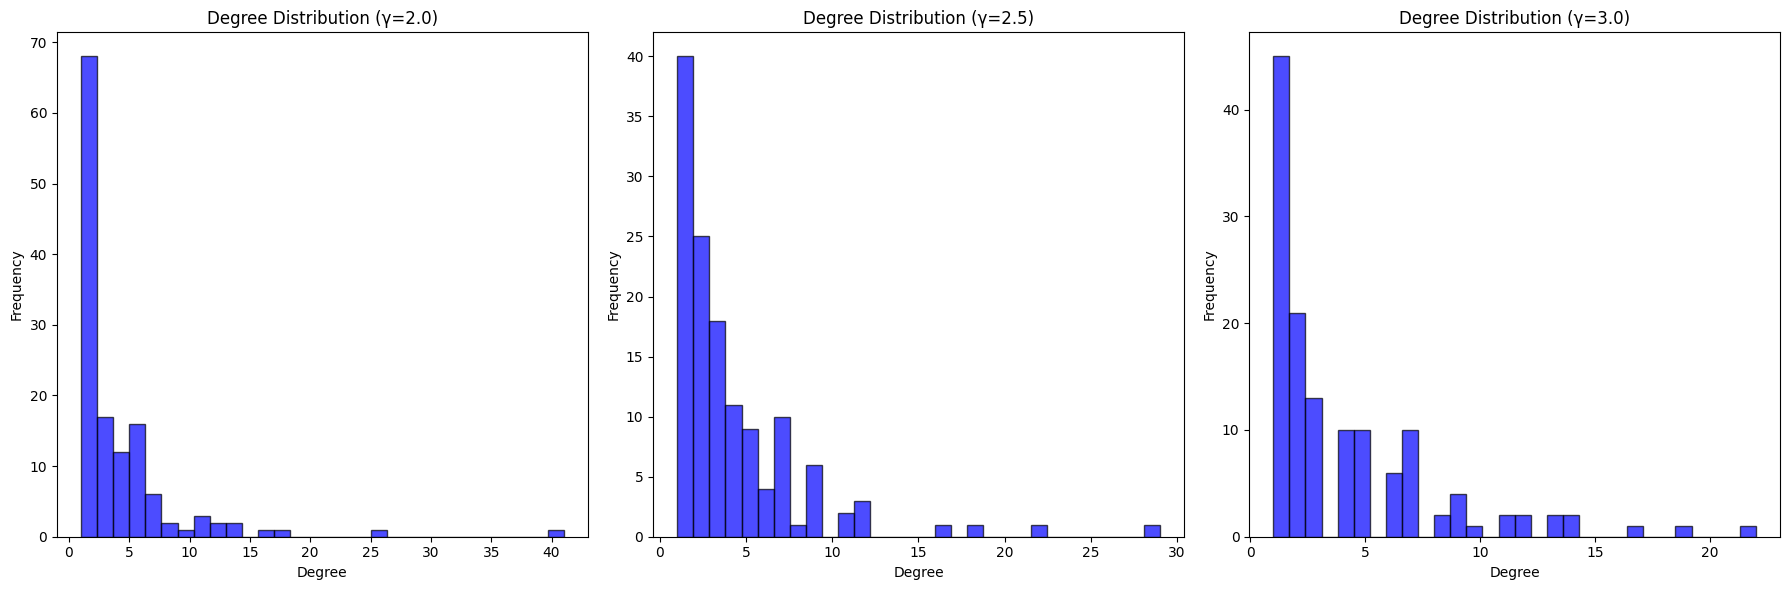

In [28]:
# Plot degree distributions
fig, axs = plt.subplots(1, len(gamma_values), figsize=(18, 6))

for i, degree_sequence in enumerate(degree_distributions):
    axs[i].hist(degree_sequence, bins=30, alpha=0.7, color='blue', edgecolor='black')
    axs[i].set_title(f'Degree Distribution (γ={gamma_values[i]})')
    axs[i].set_xlabel('Degree')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
average_clustering_coeffs

[0.06263955297685132, 0.07296835963355204, 0.05154476831831984]

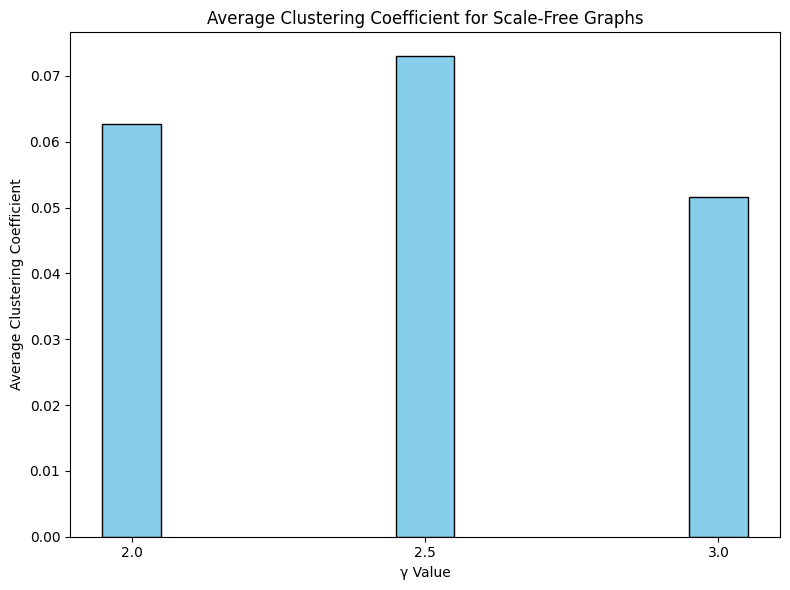

In [30]:
# Plot average clustering coefficients 
bar_width = 0.2  
x_indices = np.arange(len(gamma_values))  

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x_indices, average_clustering_coeffs, width=bar_width, color='skyblue', edgecolor='black')
ax.set_title('Average Clustering Coefficient for Scale-Free Graphs')
ax.set_xlabel('γ Value')
ax.set_ylabel('Average Clustering Coefficient')
ax.set_xticks(x_indices)
ax.set_xticklabels(gamma_values)  

plt.tight_layout()
plt.show()

## (c) Generate graphs based on Barab´asi-Albert Model, and each of them should have the same number of nodes as Facebook-Ego. Please generate 9 graphs with three different values of m0 and m. Please plot the graph structures, degree distributions, and clustering coefficients as well.


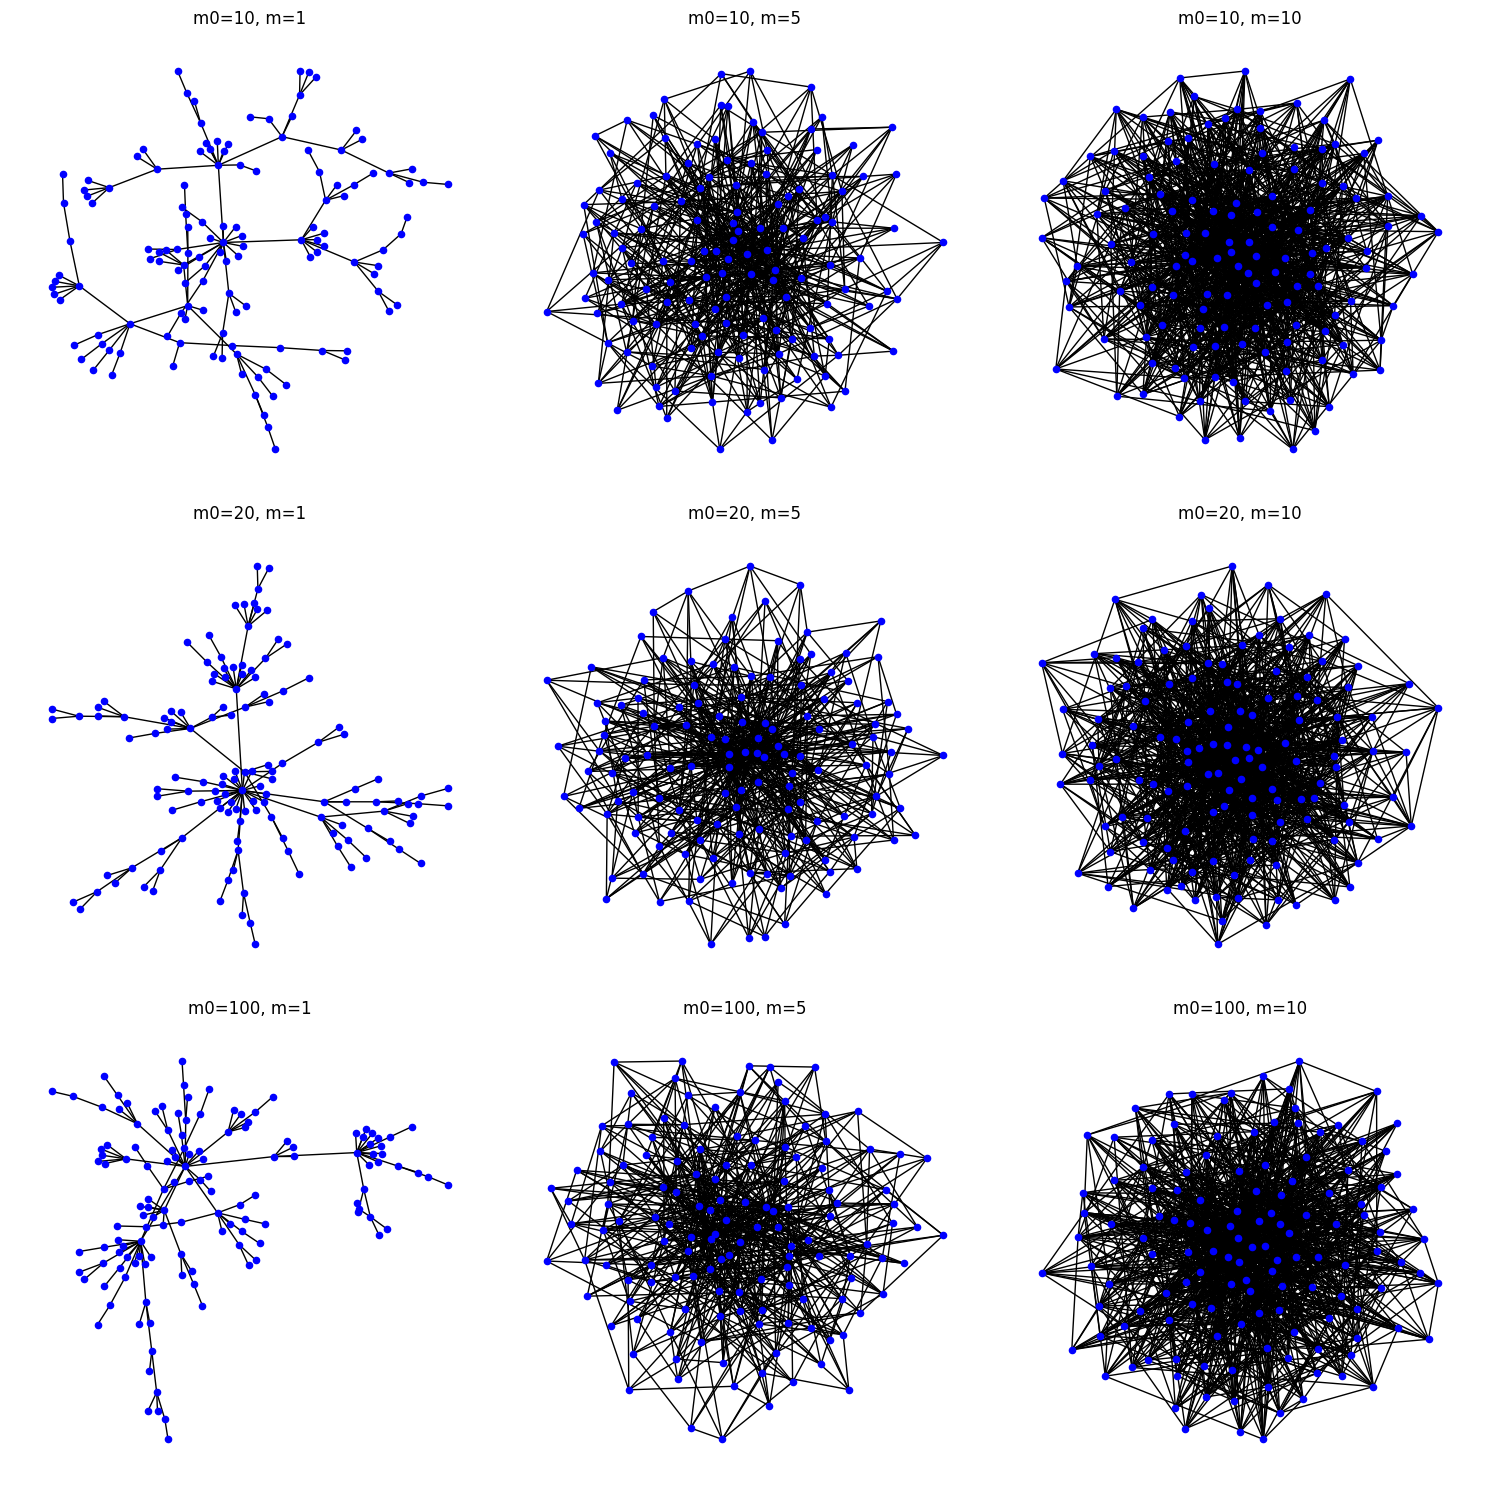

In [31]:
m0_values = [10, 20, 100]
m_values = [1, 5, 10]

# Generate 9 graphs based on the combinations of m0 and m
graphs = []
labels = []
for m0 in m0_values:
    for m in m_values:
        ba_graph = nx.barabasi_albert_graph(facebook_num_nodes, m)
        graphs.append(ba_graph)
        labels.append(f'm0={m0}, m={m}')

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, graph in enumerate(graphs):
    pos = nx.spring_layout(graph)
    row, col = divmod(i, 3)
    nx.draw(graph, pos, ax=axs[row, col], node_size=20, node_color='blue', with_labels=False)
    axs[row, col].set_title(f'm0={m0_values[row]}, m={m_values[col]}')
plt.tight_layout()
plt.show()


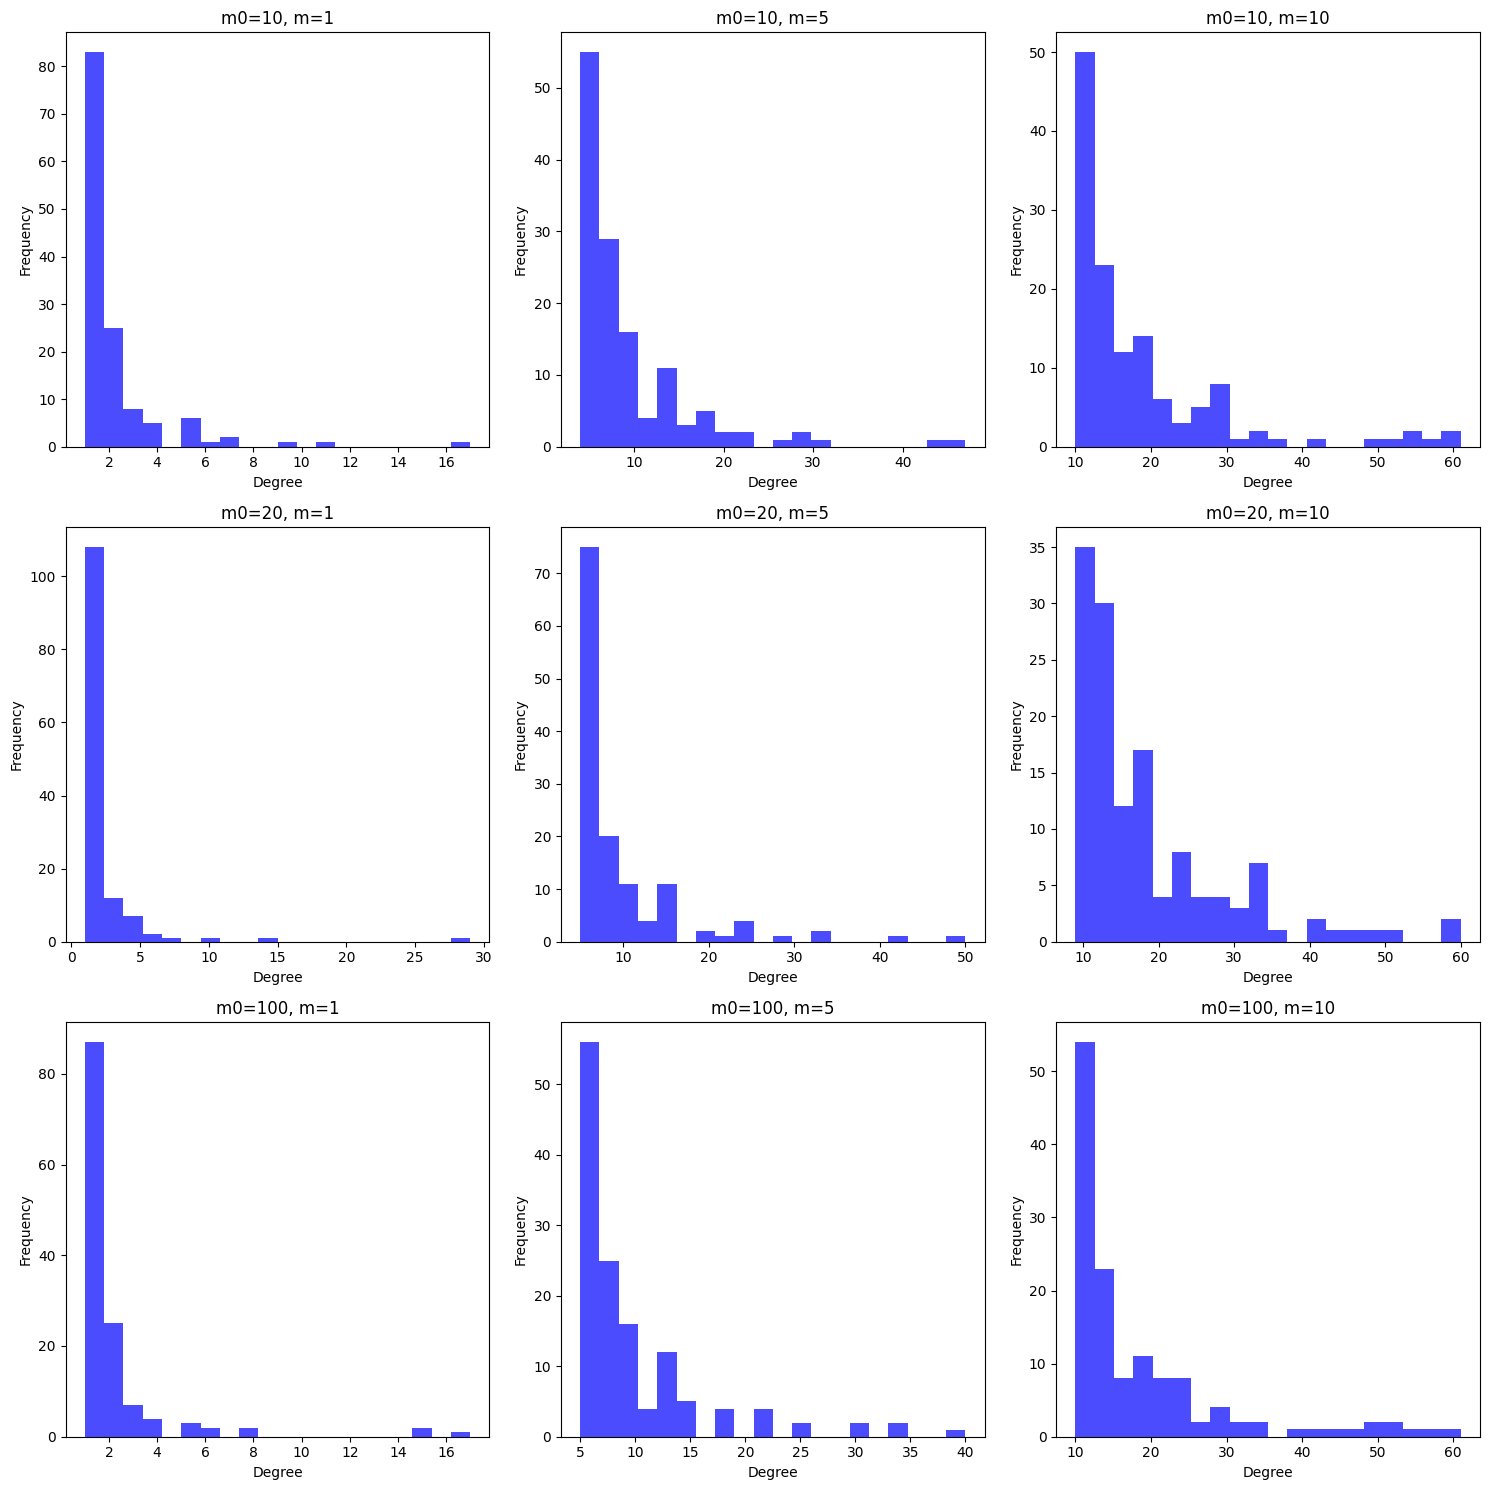

In [32]:
# Plot the degree distributions (9 subplots)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, graph in enumerate(graphs):
    degrees = [deg for _, deg in graph.degree()]
    row, col = divmod(i, 3)
    axs[row, col].hist(degrees, bins=20, color='blue', alpha=0.7)
    axs[row, col].set_title(f'm0={m0_values[row]}, m={m_values[col]}')
    axs[row, col].set_xlabel('Degree')
    axs[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

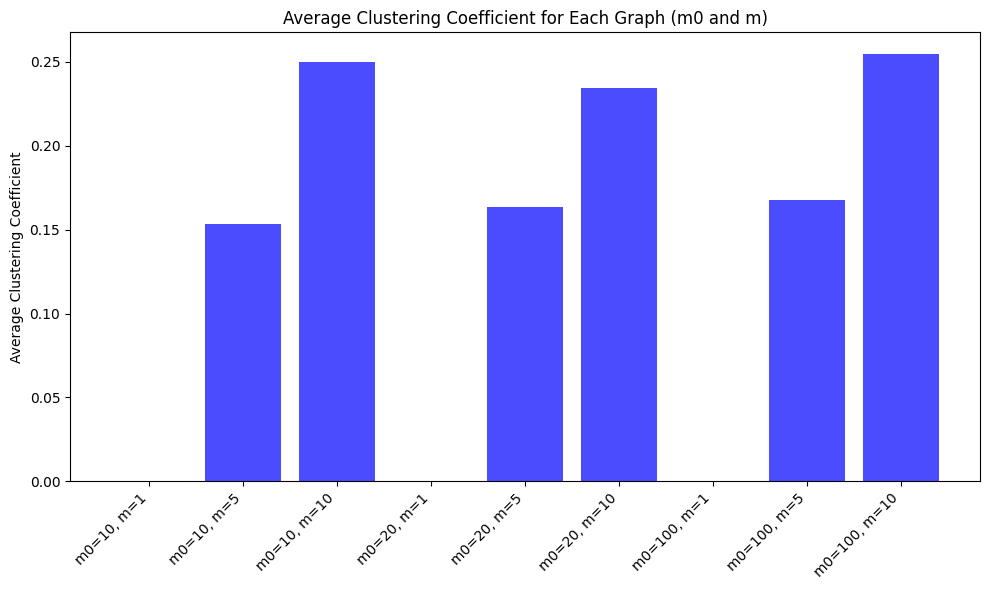

In [33]:
# Plot average clustering coefficient 
avg_clustering_coeffs = [np.mean(list(nx.clustering(graph).values())) for graph in graphs]

plt.figure(figsize=(10, 6))
plt.bar(labels, avg_clustering_coeffs, color='blue', alpha=0.7)
plt.title('Average Clustering Coefficient for Each Graph (m0 and m)')
plt.ylabel('Average Clustering Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
avg_clustering_coeffs

[0.0,
 0.15321268141021768,
 0.24981039348571618,
 0.0,
 0.1636972408216418,
 0.23460916639940518,
 0.0,
 0.1679350302696025,
 0.2547974209194269]

## (d) Please compare your Facebook-Ego network, Twitter-Ego network with the generated random graphs in (a), (b) and (c). Which random graph(s) approximates your networks at most? Why?


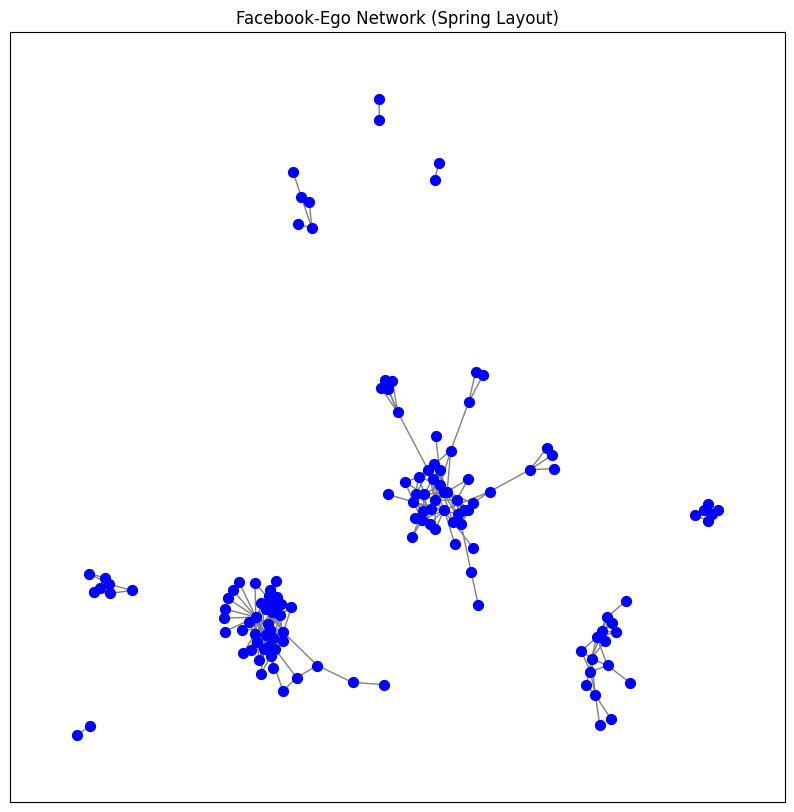

In [35]:
# Visualize the network using the spring layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(facebook_G, seed=42)  
nx.draw_networkx(facebook_G, pos, node_size=50, node_color='blue', with_labels=False, edge_color='gray')

plt.title('Facebook-Ego Network (Spring Layout)')
plt.show()

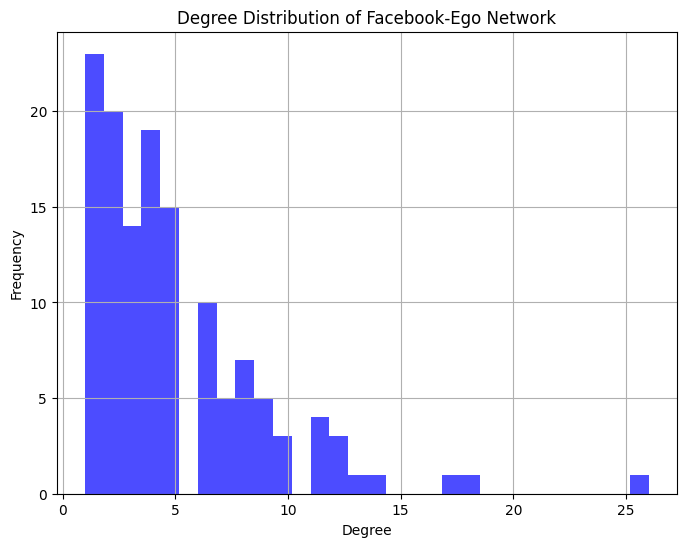

In [36]:
degrees = [deg for node, deg in facebook_G.degree()]

# Plot the degree distribution
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=30, color='blue', alpha=0.7)

plt.title('Degree Distribution of Facebook-Ego Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

In [37]:
# Calculate the average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(facebook_G)
print(f'Average Clustering Coefficient: {avg_clustering_coefficient:.4f}')

Average Clustering Coefficient: 0.4840


###  Both the Facebook and Twitter networks align well with the Barabási-Albert model due to their scale-free nature and the principle of preferential attachment. However, a key difference lies in the clustering coefficient: in Barabási-Albert networks, the clustering coefficient is typically low, while in real-world networks like Facebook, it is higher. This indicates that real social networks exhibit stronger local connectivity compared to the simpler connection dynamics of the Barabási-Albert model.